### Problem 1: Linear Regression, (60 points)

For this problem we will explore linear regression, the creation of additional features, and cross-validation.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None)

1.Load the “ data/curve80.txt ” data set, and split it into 75% / 25% training/test. The first column
data[:,0] is the scalar feature (x) values; the second column data[:,1] is the target value y for each
example. For consistency in our results, don’t reorder (shuffle) the data (they’re already in a random order),
and use the first 75% of the data for training and the rest for testing:

In [154]:
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)
print("Xtr shape is ", Xtr.shape)
print("Xte shape is ", Xte.shape)
print("Ytr shape is ", Ytr.shape)
print("Yte shape is ", Yte.shape)

Xtr shape is  (60, 1)
Xte shape is  (20, 1)
Ytr shape is  (60,)
Yte shape is  (20,)


2.Use the provided linearRegress class to create a linear regression predictor of y given x. You can plot the
resulting function by simply evaluating the model at a large number of x values, xs :

In [155]:
lr = ml.linear.linearRegress( Xtr, Ytr )
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict( xs )

(a) Plot the training data points along with your prediction function in a single plot. (10 points)

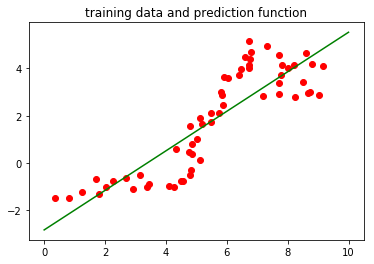

In [156]:
plt.scatter(Xtr, Ytr, c = "r")
plt.plot(xs, ys, c= 'g')
plt.title("training data and prediction function")
plt.show()

(b) Print the linear regression coefficients ( lr.theta ) and verify that they match your plot. (5 points)

In [157]:
print('regression coefficients is', lr.theta)

regression coefficients is [[-2.82765049  0.83606916]]


(c) What is the mean squared error of the predictions on the training and test data? (10 points)

In [158]:
def MSE(X, Y):
    Yhat = lr.predict(X)
    Ys = np.atleast_2d(Y).T
    e = Ys - Yhat
    j = e.T.dot(e)/X.shape[0]
    
    return np.mean(j)

print('mean squared error of training data is', MSE(Xtr, Ytr))
print('mean squared error of test data is', MSE(Xte, Yte))

mean squared error of training data is 1.1277119556093909
mean squared error of test data is 2.2423492030101246


3.Try fitting y = f (x) using a polynomial function f (x) of increasing order. Do this by the trick of adding
additional polynomial features before constructing and training the linear regression object. You can do this
easily yourself; you can add a quadratic feature of Xtr with

Train models of degree d = 1, 3, 5, 7, 10, 18 and:

In [159]:
degrees = [1, 3, 5, 7, 10, 18]
tr_error = []
te_error = []

(a) plot their learned prediction functions f (x) (15 points)

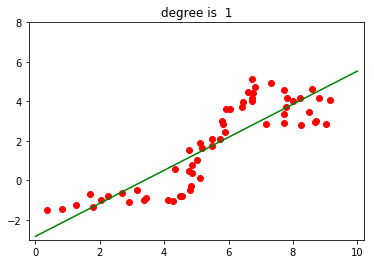

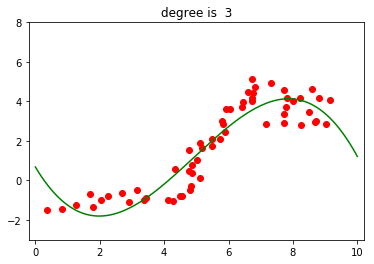

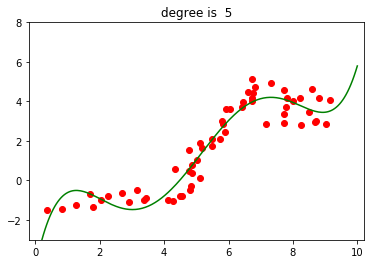

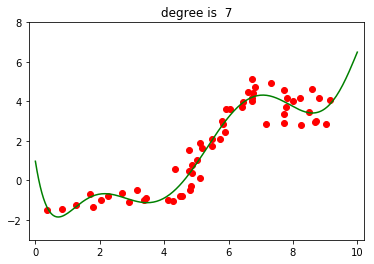

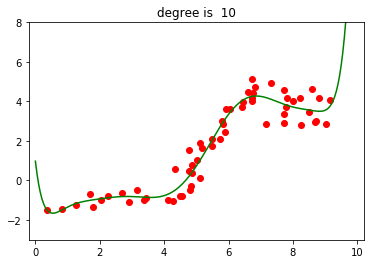

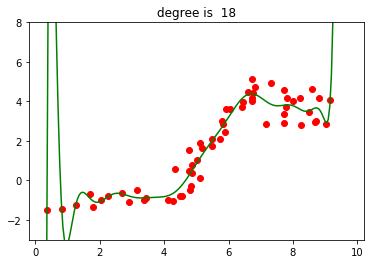

In [160]:
for degree in degrees:
    
    def Phi(X):
        return ml.transforms.rescale( ml.transforms.fpoly(X, degree, False), params)[0]
    
    # get the params and XtrP
    XtrP = ml.transforms.fpoly(Xtr, degree, False)
    XtrP, params = ml.transforms.rescale( XtrP )
    # learning
    lr = ml.linear.linearRegress( XtrP, Ytr )
    # plot
    plt.scatter(Xtr, Ytr, c = 'r')
    plt.plot(xs, lr.predict(Phi(xs)), c = 'g')
    plt.title("degree is  " + str(degree))
    plt.xlim(-0.2, 10.2)
    plt.ylim(-3, 8)
    plt.show()
    
    tr_error.append(MSE(XtrP, Ytr))
    te_error.append(MSE(Phi(Xte), Yte))

(b) plot their training and test errors on a log scale ( semilogy ) as a function of the degree. (10 points)

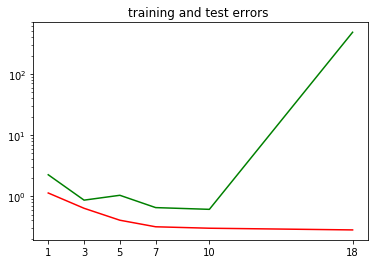

In [161]:
plt.semilogy(degrees, tr_error, c = 'r')
plt.semilogy(degrees, te_error, c = 'g')
plt.xticks(degrees, degrees)
plt.title("training and test errors ")
plt.show()

(c) What polynomial degree do you recommend? (5 points)

I recommand degree 10, because the training and test error are both lowest in the plot.

### Problem 2: Cross-validation (35 points)

In the previous problem, you decided what degree of polynomial fit to use based on performance on some test
data1
. Let’s now imagine that you did not have access to the target values of the test data you held out in the
previous problem, and wanted to decide on the best polynomial degree.
Of course, we could simply repeat the exercise, further splitting Xtr into a training and validation split,
and then assessing performance on the validation data to decide on a degree. But when training is reasonably
fast, it can be more effective to use cross-validation to estimate the optimal degree. Cross-validation works by
creating many such training/validation splits, called folds, and using all of these splits to assess the “out-of-sample”
(validation) performance by averaging them. You can do a 5-fold validation test, for example, by

1. Plot the five-fold cross-validation error and test error (with semilogy , as before) as a function of degree.
(10 points)

MSE is  1.2118626629641984 when degree is  1
MSE is  0.7429005752051661 when degree is  3
MSE is  0.5910703726406558 when degree is  5
MSE is  0.7335637831345124 when degree is  7
MSE is  0.7677056876078964 when degree is  10
MSE is  244153.64879623707 when degree is  18


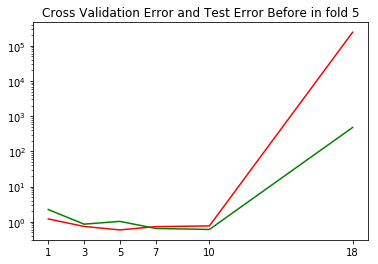

In [162]:
def plot(nFolds, MSE):

    plt.semilogy(degrees, MSE, c = 'r')
    plt.semilogy(degrees, te_error, c = 'g')
    plt.xticks(degrees, degrees)
    plt.title('Cross Validation Error and Test Error Before in fold ' + str(nFolds))
    plt.show()
    
def computeMSE(nFolds, log):
    MSE = []
    for degree in degrees:
        MSE.append(computeByDegree(degree, nFolds, log))
    return MSE

def computeByDegree(degree, nFolds, log):
    def Phi(X):
            return ml.transforms.rescale( ml.transforms.fpoly(X, degree, False), params)[0]
    J = []
    for iFold in range(nFolds):
        # split the validation and training data
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
        Yvi = Yvi[:, np.newaxis]
        # get the params and XtiP
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP, params = ml.transforms.rescale( XtiP )
        # learning
        learner = ml.linear.linearRegress( XtiP, Yti )
        # predict
        Yva_p = learner.predict(Phi(Xvi))
        # append the error
        J.append(np.mean((Yva_p - Yvi) ** 2))
    if log:
        print("MSE is ", np.mean(J), "when degree is ", degree)
    return np.mean(J)
    
plot(5, computeMSE(5, True))

2. How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the actual test
data (Problem 1)? (5 points)


When degree < 5, the MSE estimates from five-fold cross-validation is smaller than the MSEs evaluated on the actual test data; 

When degree > 5, the MSEs evaluated on the actual test data is larger, and the five-fold cross-validation error increased much faster than the actual test data as degree increases.

3. Which polynomial degree do you recommend based on five-fold cross-validation error? (5 points)

I recommand degree 5, because the cross validation error is the lowest in the plot.

4. For the degree that you picked in step 3, plot the cross-validation error as the number of folds is varied
(nFolds = 2,3,4,5,6,10,12,15), again with semilogy . What pattern do you observe, and how do you
explain it? (15 points)

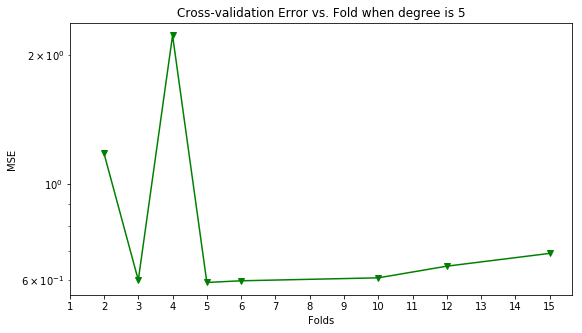

In [163]:
nFolds = [2,3,4,5,6,10,12,15]
MSE_8 = []
for nFold in nFolds:
    MSE_8.append(computeByDegree(5, nFold, False))


fig, ax = plt.subplots(1,1, figsize=(9, 5))
ax.semilogy(nFolds, MSE_8, marker='v', c = "g")
ax.set_xlabel("Folds")
ax.set_ylabel("MSE")
ax.set_title("Cross-validation Error vs. Fold when degree is 5")
ax.set_xticks(np.arange(1, 16, 1))

when fold is low, for example < 3, the cross-validation error is a little high, because the k is so small, we just use the a little bunch data to validate. So it is more likely to be underfitting. But when k is large, another question is over-fitting. So we should choose an appropriate fold to test train our model.

### Statement of Collaboration

**I did my homeword independently.**